# WeRateDog Data Wrangling Project


## Table of Content:
- [Project Introduction](#intro)
- [Gather Data](#Gather)
- [Access Data](#Access)
    - [Access Data Report](#AccessReport)
- [Clean Data](#Clean)
- [Store Data](#Store)
- [Analysis and visualize](#Analysis)
- [Conclusion](#Conclusion)

<a id ='intro'></a>
## Project Introduction:

This is a data wrangling project build for twitter data `WeRateDogs`. WeRateDogs is a Twitter account that rates people's dog with comments and the ratings of the dog in a humor way. 

Before further analysis and create intersting viuslization of the data, we need to download tweets, clean data and make it to be more structured, accuracy and analysis friendly strucutre. 

We have tweeter archive data, which is provided and rough segment, we will also use twitter API to query each tweet's JSON data. Additionaly, we also get the data that use neural network classify breeds of dogs through dog image based on each tweet's picture. 

After gathering all the data, we need to briefly access the data, identify any quality issue or untidy issue. Then clean the data, fix any tidiness or quality issue, deliver cleaned data and prepare for further analysis.

Then we will try to analyze and visualize the wrangled data, delivery interesting insights and data visualization.

<a id ='Gather'></a>
## 1.Gather Data

There are three dataset: <br>
1. `twitter_archive`The WeRateDogs Twitter archive. This is provided by udacity course and download as csv file 'twitter_archive_enhanced.csv' <br>

2. `tweet_image_prediction` The tweet image predictions. Accroding from the neural network model, the breed of dog is present in predicted by each tweet's dog image. This data is hosted on Udacity's servers and will be programmatically download using Requests library from the following url: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. `tweet_collect` Gather each tweet's retweet count and favorite count to get futher info. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called 'tweet_json.txt' file. 

In [1]:
# import all the libraries will be used in this project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

# import data visulization package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import twitter_archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Use request lib to download tsv file 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    
with open('image_predictions.tsv', mode = 'wb') as file:
    image_predictions = requests.get(url,auth = ('user','pass'))
    file.write(image_predictions.content)


# Read the downloaded file into a dataframe tweet_image_prediction
tweet_image_prediction = pd.read_csv('image-predictions.tsv',sep = '\t',encoding = 'utf-8')

In [4]:
# Access to tweet_json file by twitter API
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
# Collect data using API
tweet_ids = twitter_archive.tweet_id
tweet_data = []

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(tweet_ids):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            tweet_data.append(tweet_id)
        except Exception as e:
            print("Error with tweet id:" + str(tweet_id))

Error with tweet id:888202515573088257
Error with tweet id:873697596434513921
Error with tweet id:872668790621863937
Error with tweet id:872261713294495745
Error with tweet id:869988702071779329
Error with tweet id:866816280283807744
Error with tweet id:861769973181624320
Error with tweet id:856602993587888130
Error with tweet id:851953902622658560
Error with tweet id:845459076796616705
Error with tweet id:844704788403113984
Error with tweet id:842892208864923648
Error with tweet id:837366284874571778
Error with tweet id:837012587749474308
Error with tweet id:829374341691346946
Error with tweet id:827228250799742977
Error with tweet id:812747805718642688
Error with tweet id:802247111496568832
Error with tweet id:779123168116150273
Error with tweet id:775096608509886464
Error with tweet id:770743923962707968
Error with tweet id:758740312047005698
Error with tweet id:758474966123810816
Error with tweet id:758467244762497024
Error with tweet id:758405701903519748
Error with tweet id:75835

Error with tweet id:737445876994609152
Error with tweet id:737322739594330112
Error with tweet id:737310737551491075
Error with tweet id:736736130620620800
Error with tweet id:736392552031657984
Error with tweet id:736365877722001409
Error with tweet id:736225175608430592
Error with tweet id:736010884653420544
Error with tweet id:735991953473572864
Error with tweet id:735648611367784448
Error with tweet id:735635087207878657
Error with tweet id:735274964362878976
Error with tweet id:735256018284875776
Error with tweet id:735137028879360001
Error with tweet id:734912297295085568
Error with tweet id:734787690684657664
Error with tweet id:734776360183431168
Error with tweet id:734559631394082816
Error with tweet id:733828123016450049
Error with tweet id:733822306246479872
Error with tweet id:733482008106668032
Error with tweet id:733460102733135873
Error with tweet id:733109485275860992
Error with tweet id:732732193018155009
Error with tweet id:732726085725589504
Error with tweet id:73258

Error with tweet id:707420581654872064
Error with tweet id:707411934438625280
Error with tweet id:707387676719185920
Error with tweet id:707377100785885184
Error with tweet id:707315916783140866
Error with tweet id:707297311098011648
Error with tweet id:707059547140169728
Error with tweet id:707038192327901184
Error with tweet id:707021089608753152
Error with tweet id:707014260413456384
Error with tweet id:706904523814649856
Error with tweet id:706901761596989440
Error with tweet id:706681918348251136
Error with tweet id:706644897839910912
Error with tweet id:706593038911545345
Error with tweet id:706538006853918722
Error with tweet id:706516534877929472
Error with tweet id:706346369204748288
Error with tweet id:706310011488698368
Error with tweet id:706291001778950144
Error with tweet id:706265994973601792
Error with tweet id:706169069255446529
Error with tweet id:706166467411222528
Error with tweet id:706153300320784384
Error with tweet id:705975130514706432
Error with tweet id:70597

Error with tweet id:690989312272396288
Error with tweet id:690959652130045952
Error with tweet id:690938899477221376
Error with tweet id:690932576555528194
Error with tweet id:690735892932222976
Error with tweet id:690728923253055490
Error with tweet id:690690673629138944
Error with tweet id:690649993829576704
Error with tweet id:690607260360429569
Error with tweet id:690597161306841088
Error with tweet id:690400367696297985
Error with tweet id:690374419777196032
Error with tweet id:690360449368465409
Error with tweet id:690348396616552449
Error with tweet id:690248561355657216
Error with tweet id:690021994562220032
Error with tweet id:690015576308211712
Error with tweet id:690005060500217858
Error with tweet id:689999384604450816
Error with tweet id:689993469801164801
Error with tweet id:689977555533848577
Error with tweet id:689905486972461056
Error with tweet id:689877686181715968
Error with tweet id:689835978131935233
Error with tweet id:689661964914655233
Error with tweet id:68965

Error with tweet id:679877062409191424
Error with tweet id:679872969355714560
Error with tweet id:679862121895714818
Error with tweet id:679854723806179328
Error with tweet id:679844490799091713
Error with tweet id:679828447187857408
Error with tweet id:679777920601223168
Error with tweet id:679736210798047232
Error with tweet id:679729593985699840
Error with tweet id:679722016581222400
Error with tweet id:679530280114372609
Error with tweet id:679527802031484928
Error with tweet id:679511351870550016
Error with tweet id:679503373272485890
Error with tweet id:679475951516934144
Error with tweet id:679462823135686656
Error with tweet id:679405845277462528
Error with tweet id:679158373988876288
Error with tweet id:679148763231985668
Error with tweet id:679132435750195208
Error with tweet id:679111216690831360
Error with tweet id:679062614270468097
Error with tweet id:679047485189439488
Error with tweet id:679001094530465792
Error with tweet id:678991772295516161
Error with tweet id:67896

Error with tweet id:673887867907739649
Error with tweet id:673716320723169284
Error with tweet id:673715861853720576
Error with tweet id:673711475735838725
Error with tweet id:673709992831262724
Error with tweet id:673708611235921920
Error with tweet id:673707060090052608
Error with tweet id:673705679337693185
Error with tweet id:673700254269775872
Error with tweet id:673697980713705472
Error with tweet id:673689733134946305
Error with tweet id:673688752737402881
Error with tweet id:673686845050527744
Error with tweet id:673680198160809984
Error with tweet id:673662677122719744
Error with tweet id:673656262056419329
Error with tweet id:673636718965334016
Error with tweet id:673612854080196609
Error with tweet id:673583129559498752
Error with tweet id:673580926094458881
Error with tweet id:673576835670777856
Error with tweet id:673363615379013632
Error with tweet id:673359818736984064
Error with tweet id:673355879178194945
Error with tweet id:673352124999274496
Error with tweet id:67335

Error with tweet id:669683899023405056
Error with tweet id:669682095984410625
Error with tweet id:669680153564442624
Error with tweet id:669661792646373376
Error with tweet id:669625907762618368
Error with tweet id:669603084620980224
Error with tweet id:669597912108789760
Error with tweet id:669583744538451968
Error with tweet id:669573570759163904
Error with tweet id:669571471778410496
Error with tweet id:669567591774625800
Error with tweet id:669564461267722241
Error with tweet id:669393256313184256
Error with tweet id:669375718304980992
Error with tweet id:669371483794317312
Error with tweet id:669367896104181761
Error with tweet id:669363888236994561
Error with tweet id:669359674819481600
Error with tweet id:669354382627049472
Error with tweet id:669353438988365824
Error with tweet id:669351434509529089
Error with tweet id:669328503091937280
Error with tweet id:669327207240699904
Error with tweet id:669324657376567296
Error with tweet id:669216679721873412
Error with tweet id:66921

In [6]:
# Read tweet_collect data as pandas dataframe
tweet_collect = pd.read_json('tweet_json.txt',lines = True, encoding = 'utf-8')


<a id ='Access'></a>
## 2.Access Data

In [7]:
# Access to the gathered data:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_image_prediction = pd.read_csv('image_predictions.tsv',sep = '\t')
tweets_collect = pd.read_json('tweet_json.txt',lines = True, encoding = 'utf-8')

1.Access twitter_archive data

In [8]:
# Brief visual access and programmatic access data
# Visual access twitter_archive data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#Check twitter_archive data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
#Get brief info about twitter_archive data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Get statistical summary of twitter_archive data numerical variables
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2. Access tweet_image_prediction data

In [13]:
#Visual access tweet_image_prediction data
tweet_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
# Programmatic check tweet_image_prediction data
tweet_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
tweet_image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
#Get brief info about tweet_image_prediction data
tweet_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Get statistical summary of tweet_image_prediction data numerical variables
tweet_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


3. Access tweets_collect data

In [18]:
#Visual access tweets_collect data
tweets_collect

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36951,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7877,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31795,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5849,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23955,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3862,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40285,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8047,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38486,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8708,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19350,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2899,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11280,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1915,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",62324,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,17590,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",26627,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3995,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30479,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6850,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
# Programmatic check tweets_collect data
tweets_collect.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36951,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7877,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31795,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5849,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23955,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3862,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40285,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8047,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38486,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8708,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
tweets_collect.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
874,NaN,NaN,2016-07-29 22:53:27,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670319122597543936, 'id_str'...",0,False,RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,NaN,...,NaN,NaN,NaN,NaN,1203,False,{'created_at': 'Fri Nov 27 19:11:49 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
875,NaN,NaN,2016-07-29 18:53:24,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 759099516616339456, 'id_str'...",14913,False,Meet Toby. He has a drinking problem. Inflatab...,NaN,...,NaN,NaN,NaN,NaN,4298,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
876,NaN,NaN,2016-07-29 15:27:55,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 759047798813712385, 'id_str'...",6680,False,This is Spencer. He's part of the Queen's Guar...,NaN,...,NaN,NaN,NaN,NaN,2096,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
877,NaN,NaN,2016-07-29 02:40:28,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758854659951865861, 'id_str'...",3650,False,This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,...,NaN,NaN,NaN,NaN,923,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
878,NaN,NaN,2016-07-29 00:57:05,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758828647570558976, 'id_str'...",11507,False,This doggo is just waiting for someone to be p...,NaN,...,NaN,NaN,NaN,NaN,3959,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
#Get brief info about tweets_collect data
tweets_collect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       879 non-null datetime64[ns]
display_text_range               879 non-null object
entities                         879 non-null object
extended_entities                722 non-null object
favorite_count                   879 non-null int64
favorited                        879 non-null bool
full_text                        879 non-null object
geo                              0 non-null float64
id                               879 non-null int64
id_str                           879 non-null int64
in_reply_to_screen_name          32 non-null object
in_reply_to_status_id            32 non-null float64
in_reply_to_status_id_str        32 non-null float64
in_reply_to_user_id              32 non-null float64
in_reply_to_user_id_str          32 non-null flo

In [22]:
# Get statistical summary of tweets_collect data numerical variables
tweets_collect.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,879.000000,0.0,8.790000e+02,8.790000e+02,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,776.0,776.0,2.100000e+01,2.100000e+01,879.000000
mean,NaN,NaN,14112.649602,NaN,8.199614e+17,8.199614e+17,8.227168e+17,8.227168e+17,4.909540e+16,4.909540e+16,0.0,0.0,8.364933e+17,8.364933e+17,4870.069397
std,NaN,NaN,14858.275293,NaN,3.698249e+16,3.698249e+16,4.735314e+16,4.735314e+16,1.936930e+17,1.936930e+17,0.0,0.0,3.786469e+16,3.786469e+16,5496.584377
min,NaN,NaN,0.000000,NaN,7.588287e+17,7.588287e+17,6.671522e+17,6.671522e+17,1.185634e+07,1.185634e+07,0.0,0.0,7.591676e+17,7.591676e+17,1.000000
25%,NaN,NaN,5351.500000,NaN,7.892976e+17,7.892976e+17,8.016052e+17,8.016052e+17,2.843962e+07,2.843962e+07,0.0,0.0,8.065709e+17,8.065709e+17,2015.500000
50%,NaN,NaN,10782.000000,NaN,8.183075e+17,8.183075e+17,8.336668e+17,8.336668e+17,9.373564e+08,9.373564e+08,0.0,0.0,8.413114e+17,8.413114e+17,3319.000000
75%,NaN,NaN,19786.500000,NaN,8.482129e+17,8.482129e+17,8.558282e+17,8.558282e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.710758e+17,8.710758e+17,5688.000000
max,NaN,NaN,136166.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,58166.000000


After gathering data from difference resources, we got three dataframe:
- `twitter_archive` data, include tweet content, rating and dog category
    
- `tweet_image_prediction` data, include the neural network model predict the dog breed, and the prediction's confidential level.
    
- `tweets_collect` data, include a lot summary info including tweets id, tweets retweet counts, tweet favoriate, full_text, geo, language etc.

In [23]:
#Check if there's duplicate id in twitter_archive data
twitter_archive.tweet_id.duplicated().sum()

0

In [24]:
#Check if there's duplicate id in tweet_image_prediction data
tweet_image_prediction.tweet_id.duplicated().sum()

0

In [25]:
#Check if there's duplicate id in tweets_collect data
tweets_collect.id.duplicated().sum()

0

In [26]:
#Check if all tweets in twitter_archive data has a image prediction in tweet_image_prediciton data
miss_prediction = 0 
for tweet_id in list(twitter_archive.tweet_id):
    if tweet_id not in list(tweet_image_prediction.tweet_id):
        miss_prediction +=1

print(miss_prediction)

281


In [27]:
# Define if there's any names not a dog name in twitter_archive data
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
Daisy           7
an              7
Buddy           7
Toby            7
Oscar           6
Leo             6
Jax             6
Stanley         6
Dave            6
Milo            6
Koda            6
Jack            6
Rusty           6
Scout           6
Bella           6
Alfie           5
             ... 
Creg            1
Gin             1
Lucky           1
Mingus          1
Bertson         1
Acro            1
Pherb           1
Sunshine        1
Strider         1
Henry           1
Jordy           1
Grizzie         1
Ron             1
Kollin          1
Biden           1
Jomathan        1
Mary            1
Grizzwald       1
Ben             1
Bowie           1
Willow          1
Oreo            1
Meera           1
Fwed            1
Shooter   

<a id ='AccessReport'></a>
### Access Data Report
#### Tidiness Issue
1. `twitter_archive` data
    - There are a lot missing value in "in_reply_to_status_id" columns and "retweeted_status_id", means these are original tweets. We need to drop all the retweets and only keep the original one. 
    - Some columns are not needed for further analysis.
    - <font color = 'orange'>Dog type are seperated to four difference columns("doggo", "floofer", "pupper" and "puppo"). Each dog type should be as observation value in the dog type columns.  
    
    
2. `tweet_image_prediction` data
    - Some columns names are not descriptive. ("p1", "p2" and "p3")
    
    
3. `tweets_collect` data
    - Some columns are not needed for further analysis
    - Column "id" name is not descriptive and not consistancy with other tables.
    - <font color = 'orange'> "tweet_id" in all three dataset, these three table should be combined to one.

#### Quality Issue
1. `twitter_archive` data
    - Some dog name are capitalized and some are lower case, format not consistancy.
    - Some dog names are inccorect, such as "a", "an". It might be a typo or missing triving data from columns.
    - "tweet_id" column type incorrect.
    - "timestamp" column type incorrect.
    - Some zeros in "rating_numerator" column
    - Some extreme values in "rating_numerator" column
    - Some zeros in "rating_denominator" column
    - Some extreme values in "rating_demoninator" column
    
    
2. `tweet_image_prediction` data
    - Some the dog prediction results are capitalized and some are lower case, not consistant.
    - Some tweets don't have image prediction.
    - "p1_dog","p2_dog","p3_dog" column type is not correct.
    
    
3. `tweets_collect` data
    - Some columns type are not correct.
    

<a id ='Clean'></a>
## 3.Clean Data

In [28]:
# Make a copy of all data
twitter_clean = twitter_archive.copy()
image_pred_clean = tweet_image_prediction.copy()
tweets_count_clean = tweets_collect.copy()

### Tidiness Issue - `twitter_archive` data clean

#### 1.There are a lot missing value in "in_reply_to_status_id" columns and "retweeted_status_id", means these are original tweets. We need to drop all the retweets and only keep the original one.

#### Clean: only keep the tweets that are not retweets.

In [29]:
#Only keep original tweets
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isna()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isna()]

#### Test

In [30]:
#Check cleaned data info
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### 2.Some columns are not needed for further analysis.

#### Clean: Drop the columns not needed

In [31]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

#### Test

In [32]:
#Check 
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 3.Dog type are seperated to four difference columns("doggo", "floofer", "pupper" and "puppo"). Each dog type should be as observation value in the dog type columns.  

#### Clean: unpivot dog stage table into single column "dog_stage" and drop all the original dog stage columns.

<font color = 'blue'> consider some of the dogs are not belong to any dog_stage and shown record as "None". We are not using pd.melt function but direclty create additonal column "dog_stage" and assign value based on the previous dog columns record.

In [33]:
#Use loc condition to assign value to new column 'dog_stage'
twitter_clean.loc[twitter_clean.doggo == 'doggo','dog_stage'] = 'doggo'
twitter_clean.loc[twitter_clean.floofer == 'floofer','dog_stage'] = 'floofer'
twitter_clean.loc[twitter_clean.pupper == 'pupper','dog_stage'] = 'pupper'
twitter_clean.loc[twitter_clean.doggo == 'puppo','dog_stage'] = 'puppo'

#Drop original 4 columns
twitter_clean = twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1)

#### Test

In [34]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [35]:
# Brief check the part of table after melt
twitter_clean[['name','dog_stage']]

,name,dog_stage
0,Phineas,NaN
1,Tilly,NaN
2,Archie,NaN
3,Darla,NaN
4,Franklin,NaN
5,None,NaN
6,Jax,NaN
7,None,NaN
8,Zoey,NaN
9,Cassie,doggo


In [36]:
# Brief check the info for the table
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             313 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Tidiness Issue - `tweet_image_prediction` data clean

#### 1.Some columns names are not descriptive

#### Clean: change column names to be full descriptive names

In [37]:
image_pred_clean.rename(columns = {"p1":"picture_1", "p1_conf":"picture_1_conf", "p1_dog":"picture_1_dog",
                                   "p2":"picture_2", "p2_conf":"picture_2_conf", "p2_dog":"picture_2_dog",
                                  "p3":"picture_3", "p3_conf":"picture_3_conf", "p3_dog":"picture_3_dog"}, inplace = True)

#### Test

In [38]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
picture_1         2075 non-null object
picture_1_conf    2075 non-null float64
picture_1_dog     2075 non-null bool
picture_2         2075 non-null object
picture_2_conf    2075 non-null float64
picture_2_dog     2075 non-null bool
picture_3         2075 non-null object
picture_3_conf    2075 non-null float64
picture_3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,picture_1,picture_1_conf,picture_1_dog,picture_2,picture_2_conf,picture_2_dog,picture_3,picture_3_conf,picture_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness Issue - `tweets_collect` data clean

#### 1.Some columns names are not needed for further analysis

#### Clean: Drop columns that are not needed

In [40]:
#Drop columns 
tweets_count_clean = tweets_count_clean[['id','retweet_count','favorite_count']]

##### Test

In [41]:
tweets_count_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7877,36951
1,892177421306343426,5849,31795
2,891815181378084864,3862,23955
3,891689557279858688,8047,40285
4,891327558926688256,8708,38486


#### 2. Column "id" name is not descriptive and not consistancy with other tables

#### Clean: Change columns "id" to "tweet_id"

In [42]:
tweets_count_clean.rename({"id":"tweet_id"},axis = 1, inplace = True)

##### Test

In [43]:
tweets_count_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7877,36951
1,892177421306343426,5849,31795
2,891815181378084864,3862,23955
3,891689557279858688,8047,40285
4,891327558926688256,8708,38486


####  3. tweet_id in all three dataset, these three table should be combined to one.

#### Clean: Merge all three table to one table, join by tweet_id column.

In [44]:
#Merge all three dataframe to tweeter_df, using outer join by tweet id
tweeter_df = pd.merge(twitter_clean,image_pred_clean, how = 'outer', on = ['tweet_id'])
tweeter_df = pd.merge(tweeter_df, tweets_count_clean, how = 'outer', on = ['tweet_id'])

##### Test

In [45]:
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 22 columns):
tweet_id              2316 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
dog_stage             313 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
picture_1             2075 non-null object
picture_1_conf        2075 non-null float64
picture_1_dog         2075 non-null object
picture_2             2075 non-null object
picture_2_conf        2075 non-null float64
picture_2_dog         2075 non-null object
picture_3             2075 non-null object
picture_3_conf        2075 non-null float64
picture_3_dog         2075 non-null object
retweet_count         879 non

In [46]:
tweeter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,picture_1_conf,picture_1_dog,picture_2,picture_2_conf,picture_2_dog,picture_3,picture_3_conf,picture_3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7877.0,36951.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5849.0,31795.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3862.0,23955.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8047.0,40285.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8708.0,38486.0


### Quality Issue - `tweeter_df` data clean

#### 1.Some dog name are capitalized and some are lower case, format not consistancy

#### Clean: Change all dog names into lower case

In [47]:
#Change all dog names to lower case
tweeter_df['name'] = tweeter_df.name.str.lower()

#### Test

In [48]:
#Check if all dog names are lower case
tweeter_df.name.str.islower().sum()

2097

#### 2. Some dog names are inccorect, such as "a", "an","none". It might be a typo or missing triving data from columns.

#### Clean: Change all the typo dog names to "none"

In [49]:
#check for the unique of names of dogs
tweeter_df.name.unique()

array(['phineas', 'tilly', 'archie', 'darla', 'franklin', 'none', 'jax',
       'zoey', 'cassie', 'koda', 'bruno', 'ted', 'stuart', 'oliver', 'jim',
       'zeke', 'ralphus', 'gerald', 'jeffrey', 'such', 'canela', 'maya',
       'mingus', 'derek', 'roscoe', 'waffles', 'jimbo', 'maisey', 'earl',
       'lola', 'kevin', 'yogi', 'noah', 'bella', 'grizzwald', 'rusty',
       'gus', 'stanley', 'alfy', 'koko', 'rey', 'gary', 'a', 'elliot',
       'louis', 'jesse', 'romeo', 'bailey', 'duddles', 'jack', 'steven',
       'beau', 'snoopy', 'shadow', 'emmy', 'aja', 'penny', 'dante',
       'nelly', 'ginger', 'benedict', 'venti', 'goose', 'nugget', 'cash',
       'jed', 'sebastian', 'sierra', 'monkey', 'harry', 'kody', 'lassie',
       'rover', 'napolean', 'boomer', 'cody', 'rumble', 'clifford',
       'dewey', 'scout', 'gizmo', 'walter', 'cooper', 'harold', 'shikha',
       'lili', 'jamesy', 'coco', 'sammy', 'meatball', 'paisley', 'albus',
       'neptune', 'belle', 'quinn', 'zooey', 'dave', 'jer

In [50]:
# Create a list that is not dog names
no_names = ['such','a','quite','not','one','o','very','an','this','all','old','none','my','by','his','such',np.nan]

In [51]:
# Create loop to swap all the non-names to none
for x in tweeter_df.name:
    if x in no_names:
        tweeter_df['name'].replace(x, "none", inplace = True)

#### Test

In [52]:
#Check the value counts for dog names
tweeter_df.name.value_counts()

none         904
lucy          11
charlie       11
oliver        10
cooper        10
penny          9
tucker         9
lola           8
sadie          8
the            8
winston        8
daisy          7
toby           7
jax            6
koda           6
oscar          6
stanley        6
bailey         6
bo             6
bella          6
scout          5
milo           5
rusty          5
louis          5
bentley        5
dave           5
buddy          5
chester        5
leo            5
jerry          4
            ... 
torque         1
kara           1
sailer         1
bradley        1
tess           1
banjo          1
cecil          1
zuzu           1
darby          1
bobbay         1
duchess        1
hermione       1
dot            1
bebe           1
pherb          1
trevith        1
scott          1
chubbs         1
barney         1
chelsea        1
nigel          1
ralpher        1
rhino          1
walker         1
stephanus      1
darrel         1
karll          1
griswold      

In [53]:
# Check how many names are np.nan
tweeter_df.name.isna().sum()

0

#### 3. Some tweet_id has no rating and no picture prediction

#### Clean: Drop tweets row that has no rating and no picture prediction

In [54]:
# Drop tweets that has no dog rating and no prediction
tweeter_df.dropna(subset = ['picture_1','rating_numerator'],how = 'all', inplace = True)

##### Test

In [55]:
# Check num of records left
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 22 columns):
tweet_id              2201 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2201 non-null object
dog_stage             313 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
picture_1             2075 non-null object
picture_1_conf        2075 non-null float64
picture_1_dog         2075 non-null object
picture_2             2075 non-null object
picture_2_conf        2075 non-null float64
picture_2_dog         2075 non-null object
picture_3             2075 non-null object
picture_3_conf        2075 non-null float64
picture_3_dog         2075 non-null object
retweet_count         764 non

#### 4. Some columns type are incorrect

#### Clean: 
- Change "tweet_id" column type to str
- Change "timestamp" column to datetime
- chante "dog_stage" type to category
- chante "picture_1_dog", "picture_2_dog" and "picture_3_dog" type to boolean

In [56]:
#Check columns type before clean
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 22 columns):
tweet_id              2201 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2201 non-null object
dog_stage             313 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
picture_1             2075 non-null object
picture_1_conf        2075 non-null float64
picture_1_dog         2075 non-null object
picture_2             2075 non-null object
picture_2_conf        2075 non-null float64
picture_2_dog         2075 non-null object
picture_3             2075 non-null object
picture_3_conf        2075 non-null float64
picture_3_dog         2075 non-null object
retweet_count         764 non

In [57]:
#Change "tweet_id" column type to str
tweeter_df.tweet_id = tweeter_df.tweet_id.astype(str)

In [58]:
#Change "timestamp" column to datetime
tweeter_df.timestamp = pd.to_datetime(tweeter_df.timestamp)

In [59]:
#Change "dog_stage" column type to category
tweeter_df.dog_stage = tweeter_df.dog_stage.astype('category')

In [60]:
#chante "picture_1_dog", "picture_2_dog" and "picture_3_dog" type to boolean
tweeter_df.picture_1_dog = tweeter_df.picture_1_dog.astype(bool)
tweeter_df.picture_2_dog = tweeter_df.picture_2_dog.astype(bool)
tweeter_df.picture_3_dog = tweeter_df.picture_3_dog.astype(bool)

#### Test

In [61]:
#Check column type
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 22 columns):
tweet_id              2201 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2201 non-null object
dog_stage             313 non-null category
jpg_url               2075 non-null object
img_num               2075 non-null float64
picture_1             2075 non-null object
picture_1_conf        2075 non-null float64
picture_1_dog         2201 non-null bool
picture_2             2075 non-null object
picture_2_conf        2075 non-null float64
picture_2_dog         2201 non-null bool
picture_3             2075 non-null object
picture_3_conf        2075 non-null float64
picture_3_dog         2201 non-null bool
retweet_count         76

#### 5. Some the dog prediction results are capitalized and some are lower case, not consistant.
#### Clean: change all dog prediction result to be lower case

In [62]:
# change all picture prediction to lower case 
tweeter_df['picture_1'] = tweeter_df.picture_1.str.lower()
tweeter_df['picture_2'] = tweeter_df.picture_2.str.lower()
tweeter_df['picture_3'] = tweeter_df.picture_3.str.lower()

#### Test

In [63]:
# check if all dog prediction results are lower case
(tweeter_df.picture_1.str.islower() == 0).sum()

0

In [64]:
(tweeter_df.picture_2.str.islower() == 0).sum()

0

In [65]:
(tweeter_df.picture_3.str.islower() == 0).sum()

0

#### 6. some zero and extreme value in columns "rating_numerator" and "rating_demoninator" columns
#### Clean: Go back to original text see if numerator and denominator generate wrong, and fix rating by each record. 

In [66]:
# Check extreme value in rating denominators
tweeter_df.rating_denominator.value_counts()

10.0     2080
50.0        3
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
70.0        1
170.0       1
2.0         1
120.0       1
40.0        1
20.0        1
7.0         1
Name: rating_denominator, dtype: int64

In [67]:
# filter out record with wrong rating_denominator values
pd.set_option('display.max_colwidth',-1)

wrong_deno_df = tweeter_df[tweeter_df.rating_denominator != 10]
wrong_deno_df[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
700,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
853,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
904,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
985,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1011,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1036,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1056,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


From above text content we can see some of wrong rating_denominator is on purpose but some just retrive wrong data. Will fix each rating_numerator and denominator one by one.

In [68]:
# tweet id 740373189193256964:
tweeter_df.loc[tweeter_df.tweet_id == "740373189193256964", ['rating_denominator']] = 10
tweeter_df.loc[tweeter_df.tweet_id == "740373189193256964", ['rating_numerator']] = 14

# tweet id 722974582966214656:
tweeter_df.loc[tweeter_df.tweet_id == "722974582966214656", ['rating_denominator']] = 10
tweeter_df.loc[tweeter_df.tweet_id == "722974582966214656", ['rating_numerator']] = 13

# tweet id 716439118184652801:
tweeter_df.loc[tweeter_df.tweet_id == "716439118184652801", ['rating_denominator']] = 10
tweeter_df.loc[tweeter_df.tweet_id == "716439118184652801", ['rating_numerator']] = 11

# tweet id 682962037429899265:
tweeter_df.loc[tweeter_df.tweet_id == "682962037429899265", ['rating_denominator']] = 10
tweeter_df.loc[tweeter_df.tweet_id == "682962037429899265", ['rating_numerator']] = 10

# tweet id 666287406224695296:
tweeter_df.loc[tweeter_df.tweet_id == "666287406224695296", ['rating_denominator']] = 10
tweeter_df.loc[tweeter_df.tweet_id == "666287406224695296", ['rating_numerator']] = 9

In [69]:
#Quick Test
tweeter_df.loc[tweeter_df.tweet_id == "716439118184652801"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,picture_1_conf,picture_1_dog,picture_2,picture_2_conf,picture_2_dog,picture_3,picture_3_conf,picture_3_dog,retweet_count,favorite_count
985,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,0.396495,True,malamute,0.317053,True,eskimo_dog,0.273419,True,NaN,NaN


In [70]:
# Then check with right rating_denominator what is the case will zero or wrong numerator
tweeter_df.groupby('rating_denominator')['rating_numerator'].value_counts()

rating_denominator  rating_numerator
7.0                 24.0                1  
10.0                12.0                486
                    10.0                437
                    11.0                414
                    13.0                288
                    9.0                 153
                    8.0                 98 
                    7.0                 51 
                    14.0                39 
                    5.0                 34 
                    6.0                 32 
                    3.0                 19 
                    4.0                 15 
                    2.0                 9  
                    1.0                 4  
                    0.0                 1  
                    26.0                1  
                    27.0                1  
                    75.0                1  
                    420.0               1  
                    1776.0              1  
40.0                44.0               

In [71]:
# Check case where rating numerator is not correct derived from text
wrong_nume_df = tweeter_df.query('rating_numerator >= 20 | rating_numerator <= 2')
wrong_nume_df[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
246,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10.0
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
528,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
586,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
700,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
770,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
904,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1011,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1036,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0


In [72]:
# tweet id 786709082849828864:
tweeter_df.loc[tweeter_df.tweet_id == "786709082849828864", ['rating_numerator']] = 9.75

# tweet id 778027034220126208:
tweeter_df.loc[tweeter_df.tweet_id == "778027034220126208", ['rating_numerator']] = 11.27

# tweet id 749981277374128128:
tweeter_df.loc[tweeter_df.tweet_id == "749981277374128128", ['rating_numerator']] = 17.76

# tweet id 680494726643068929:
tweeter_df.loc[tweeter_df.tweet_id == "680494726643068929", ['rating_numerator']] = 11.26

# tweet id 670842764863651840:
tweeter_df.loc[tweeter_df.tweet_id == "670842764863651840", ['rating_numerator']] = 4.2

#### Test

In [73]:
#Quick Test
tweeter_df.loc[tweeter_df.tweet_id == "778027034220126208"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,picture_1_conf,picture_1_dog,picture_2,picture_2_conf,picture_2_dog,picture_3,picture_3_conf,picture_3_dog,retweet_count,favorite_count
586,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,...,0.946718,True,cocker_spaniel,0.01595,True,lhasa,0.006519,True,1679.0,6786.0


<a id ='Store'></a>
## Store data

In [74]:
# Store the data to tweeter_df_master
tweeter_df.to_csv('tweeter_archive_master.csv')

<a id ='Analysis'></a>
## Data Analysis and Visualization

#### In this anlaysis and visulization, let's find out what factors are associated with the most trendy dog rate pic. 

#### 1.Let's first analysis what numerical columns are more correlated.

In [75]:
#Print out correlation coeffcient matrix for all the numeric variables in tweeter_df
corr = tweeter_df[['retweet_count','favorite_count','rating_numerator','rating_denominator','picture_1_conf','picture_2_conf','picture_3_conf']].corr()
corr

,retweet_count,favorite_count,rating_numerator,rating_denominator,picture_1_conf,picture_2_conf,picture_3_conf
retweet_count,1.000000,0.771003,0.083256,-0.008613,-0.053889,-0.001411,0.017789
favorite_count,0.771003,1.000000,0.101351,-0.011716,-0.020242,-0.036244,-0.007925
rating_numerator,0.083256,0.101351,1.000000,0.958441,0.039257,-0.035039,-0.014600
rating_denominator,-0.008613,-0.011716,0.958441,1.000000,0.011838,-0.037967,-0.006452
picture_1_conf,-0.053889,-0.020242,0.039257,0.011838,1.000000,-0.511298,-0.709449
picture_2_conf,-0.001411,-0.036244,-0.035039,-0.037967,-0.511298,1.000000,0.479027
picture_3_conf,0.017789,-0.007925,-0.014600,-0.006452,-0.709449,0.479027,1.000000


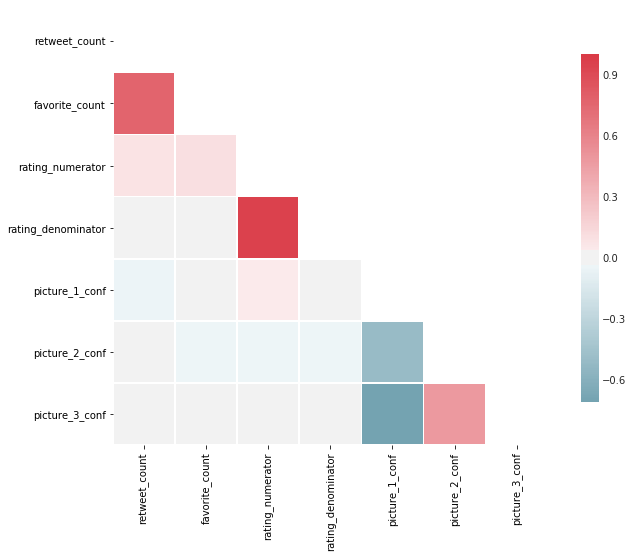

In [76]:
# This is taken from 
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Draw a heatmap for the correlation matrix

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set_style('darkgrid')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8});

From the heatmap we can see:
- the retweet_count and favorite_count are highly correlated, in general user like to retweet the tweets they like, and vice versa. 
- the correlaction between rating_numerator and favorite_count is not highly correlated, this might because we have some extreme value in the dog ratings. 
- the rating_denominator and rating_numerator are highly positively correlated. This is more close to user habit. Usually user will give 11/10 instead of 11/100. 
- dog prediction confidence level from picture_1 and picture_3 are negatively correlated. Is there any reason for this?

#### 2. Let's futher look at the dog analysis, see if dog rating has correlations with favorite_counts.

In [77]:
# Creat new columns to standardize the dog rating
tweeter_df['standard_rating'] = tweeter_df['rating_numerator']/tweeter_df['rating_denominator']

In [78]:
tweeter_df.describe()

,rating_numerator,rating_denominator,img_num,picture_1_conf,picture_2_conf,picture_3_conf,retweet_count,favorite_count,standard_rating
count,2097.000000,2097.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,764.000000,764.000000,2097.000000
mean,11.100258,10.427754,1.203855,0.594548,1.345886e-01,6.032417e-02,4875.429319,16162.823298,1.062257
std,7.856221,6.582757,0.561875,0.271174,1.006657e-01,5.090593e-02,5455.254788,14884.998035,0.221755
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,19.000000,0.000000,0.000000
25%,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,2101.500000,7657.500000,1.000000
50%,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3307.000000,12233.500000,1.100000
75%,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,5421.500000,21094.000000,1.200000
max,204.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,58166.000000,136166.000000,3.428571


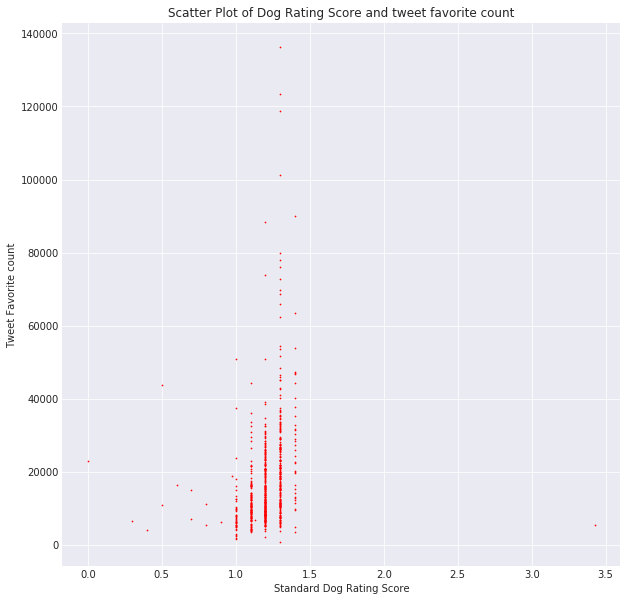

In [79]:
# Create scatter plot to see the correlation between standard_rating and favorite_counts.
plt.figure(figsize=(10, 10))
plt.xlabel('Standard Dog Rating Score')
plt.ylabel('Tweet Favorite count')
plt.plot(tweeter_df.standard_rating, tweeter_df.favorite_count, color = 'red',
           linestyle='', marker='o', markersize=0.7)
plt.title('Scatter Plot of Dog Rating Score and tweet favorite count');

We can see in general the higher dog rating will get a higher favorite_counts, however the outliers where favorite_counts more thant 60000 are not the highest rating score.

#### 3. Then let's analysis what stage of the dog is highly rated and highly favorited.

In [80]:
# Compare average favorite counts each dog stage
tweeter_favorite_avg = tweeter_df.groupby('dog_stage')['favorite_count'].mean().reset_index()
tweeter_favorite_avg

,dog_stage,favorite_count
0,doggo,18044.803922
1,floofer,20105.750000
2,pupper,17357.304348


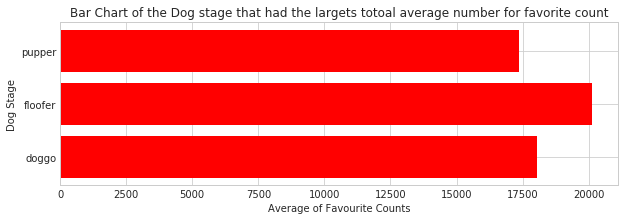

In [81]:
#plot dog stage with average_favorite_counts
sns.set_style('whitegrid')
plt.figure(figsize = (10,3))

plt.barh(range(len(tweeter_favorite_avg.dog_stage)),tweeter_favorite_avg.favorite_count,color = 'red')
plt.yticks(range(len(tweeter_favorite_avg.dog_stage)),tweeter_favorite_avg.dog_stage)
plt.xlabel('Average of Favourite Counts')
plt.ylabel('Dog Stage')
plt.title('Bar Chart of the Dog stage that had the largets totoal average number for favorite count')
plt.show();

#### In general, floofer has highest average favorite counts. The other two stage are closer lower.

In [82]:
# Compare average favorite counts each dog stage
tweeter_rate_avg = tweeter_df.groupby('dog_stage')['standard_rating'].mean().reset_index()
tweeter_rate_avg

,dog_stage,standard_rating
0,doggo,1.186301
1,floofer,1.180000
2,pupper,1.074900


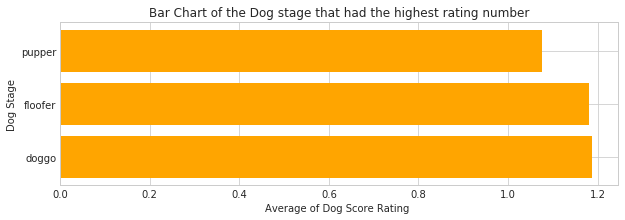

In [83]:
#plot dog stage with average_rating_counts
sns.set_style('whitegrid')
plt.figure(figsize = (10,3))

plt.barh(range(len(tweeter_rate_avg.dog_stage)),tweeter_rate_avg.standard_rating,color = 'orange')
plt.yticks(range(len(tweeter_rate_avg.dog_stage)),tweeter_rate_avg.dog_stage)
plt.xlabel('Average of Dog Score Rating ')
plt.ylabel('Dog Stage')
plt.title('Bar Chart of the Dog stage that had the highest rating number')
plt.show();

#### And from the rating, we can see floofer and doggo has closely higher rating than pupper. 

<a id ='Conclusion'></a>
## Conclusion

In this project, we gather data from mutiple datasorece regarding to tweeter WeRateDogs. After wrangling data, access data to identify the tidiness and quality issue, we clean the data.

In data analysis and visualization part,we are not surprisingly found tweet's retweet and favorate counts are positively correlated. And when we look into dog stage, we can conclude ingeneral floofer would be more popular than the other two stage.

Although we take some efforts to clean the data, there's still a large portion of missing value in the dataframe. In future we could revisit each tweet text to recheck if we could do more to improve the data quality.